# **Creating and using custom DataSets**
* **Basic concepts learnt from: A Deep understanding of Deep Learning (with Python intro) - Mark X Cohen (Udemy) - https://www.udemy.com/course/deeplearning_x**
* **Datasets available using torchvision: https://pytorch.org/vision/0.16/datasets.html**

In [1]:
# basic deep learning libraries
import numpy as np
import torch as tr

# import transformations and dataset/loader
import torchvision as tv
import torchvision.transforms as T
from torch.utils.data import Dataset,DataLoader

# import plotting libraries
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


In [18]:
# import the data
data=np.loadtxt(open('mnist/mnist_train_small.csv','rb'),delimiter=',')

# extract only the first 8
labels=data[:8,0]
data=data[:8,1:]

# normalize the data to a range of [0,1]
dataNorm = data/np.max(data)

# reshape to 2D!
dataNorm=dataNorm.reshape(dataNorm.shape[0],1,28,28)

# check sizes
print(dataNorm.shape)
print(labels.shape)

# convert to torch tensor format
dataT=tr.tensor(dataNorm).float()
labelsT=tr.tensor(labels).long()

(8, 1, 28, 28)
(8,)


**Create a new class to create our custom dataset type**

In [19]:
# The dataset class is modelled after the official class
??tr.utils.data.TensorDataset

Init signature: tr.utils.data.TensorDataset(*args, **kwds)
Source:        
class TensorDataset(Dataset[Tuple[Tensor, ...]]):
    r"""Dataset wrapping tensors.

    Each sample will be retrieved by indexing tensors along the first dimension.

    Args:
        *tensors (Tensor): tensors that have the same size of the first dimension.
    """

    tensors: Tuple[Tensor, ...]

    def __init__(self, *tensors: Tensor) -> None:
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors), "Size mismatch between tensors"
        self.tensors = tensors

    def __getitem__(self, index):
        return tuple(tensor[index] for tensor in self.tensors)

    def __len__(self):
        return self.tensors[0].size(0)
File:           ~/.local/lib/python3.8/site-packages/torch/utils/data/dataset.py
Type:           type
Subclasses:     

In [20]:
# Custom Dataset 
class customDataset(Dataset):
    
    def __init__(self,tensors,transform=None):

        # check that size of data and labels match
        assert all(tensors[0].size(0)==t.size(0) for t in tensors),"Size mismatch between tensors"

        # assign inputs
        self.tensors=tensors
        self.transform=transform

    # getting an item from the dataset
    def __getitem__(self, index):

        # return transformed version of x if there are transforms
        if self.transform:
            x=self.transform(self.tensors[0][index])
        else:
            x=self.tensors[0][index]
        
        # return labels
        y=self.tensors[1][index]

        return x,y # return the (data,label) tuple
    
    def __len__(self):
        return self.tensors[0].size(0)

**data-->dataset-->dataloader**

In [21]:
### Note: several transforms work only on PIL (Python Imaging Library)-format data, so it's common to transform to PIL, apply transformations, then transform back to tensor

# create a list of transforms to apply to the image
imgtrans=T.Compose([
    T.ToPILImage(),
    T.RandomVerticalFlip(p=0.5),
    # T.RandomRotation(90),
    T.ToTensor()
])

In [22]:
# now convert the data into datasets and then dataloaders
# convert into Pytorch Datasets (both train and test)
train_data=customDataset((dataT,labelsT),imgtrans)

# translate into dataloader objects
dataloaded=DataLoader(train_data,batch_size=8,shuffle=False)

type(train_data)

__main__.customDataset

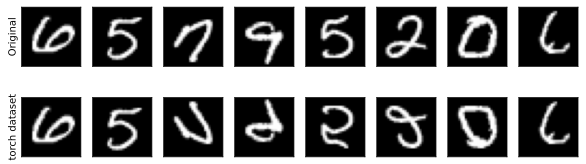

In [23]:
# Let's see the effects
# import data from the dataloader, just like during training
X,y=next(iter(dataloaded))

# create a figure
fig,axs=plt.subplots(2,8,figsize=(10,3))

# loop over the images in the dataset
for i in range(8):

    # draw images
    axs[0,i].imshow(dataT[i,0,:,:].detach(),cmap='gray')
    axs[1,i].imshow(X[i,0,:,:].detach(),cmap='gray')

    # some niceties
    for row in range(2):
        axs[row,i].set_xticks([])
        axs[row,i].set_yticks([])

# row labels
axs[0,0].set_ylabel('Original')
axs[1,0].set_ylabel('torch dataset')
plt.show()

In [24]:
# Important to know: we haven't actually increased the amount of data
len(train_data)

8